#Workshops Pytorch - in_cognitive 2019

In [0]:
import torch
import cv2
import torchvision
from torchvision.models.detection import maskrcnn_resnet50_fpn
from PIL import Image
import PIL
import urllib
torch.__version__

'1.3.1+cu100'

In [0]:
print("cv2", cv2.__version__, "TORCH", torch.__version__, "TORCHVISION",  torchvision.__version__,)

cv2 3.4.3 TORCH 1.3.1+cu100 TORCHVISION 0.4.2+cu100


In [0]:
#Grab image from: cocodataset.org
image_url = 'https://farm1.staticflickr.com/157/376152357_3ac8718e87_z.jpg'
image_response = urllib.request.urlopen(image_url) 

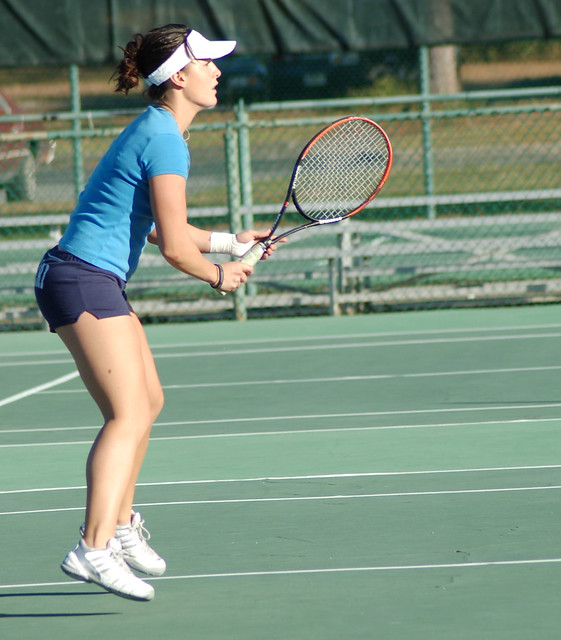

In [0]:
Image.open(image_response)    

In [0]:
img = Image.open(image_response) 

In [0]:
model = maskrcnn_resnet50_fpn(pretrained=True)  

Downloading: "https://download.pytorch.org/models/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth" to /root/.cache/torch/checkpoints/maskrcnn_resnet50_fpn_coco-bf2d0c1e.pth
100%|██████████| 170M/170M [00:00<00:00, 181MB/s]


In [0]:
from torchvision.transforms import ToTensor

In [0]:
input_tensor = ToTensor()(img) 

In [0]:
input_tensor.shape

torch.Size([3, 640, 561])

In [0]:
input_tensor = input_tensor.unsqueeze(0)

In [0]:
input_tensor.shape

torch.Size([1, 3, 640, 561])

In [0]:
model.eval()

In [0]:
outputs = model(input_tensor) 

In [0]:
len(outputs)

1

In [0]:
output = outputs[0]

In [0]:
output.keys() 

dict_keys(['boxes', 'labels', 'scores', 'masks'])

In [0]:
labels = output['labels']

boxes = output['boxes']
scores = output['scores']
masks = output['masks']

In [0]:
labels

tensor([ 1, 43,  3, 15, 15, 15,  3, 15, 15])

In [0]:
scores[scores>0.5]
person_class = 1 
score_threshold = 0.5
person_masks = []

for i in range(len(scores)):
  if scores[i] >score_threshold and labels[i]==person_class:
    person_masks.append(masks[i])

In [0]:
len(person_masks)

1

In [0]:
from torchvision.transforms import ToPILImage
import numpy as np

In [0]:
img.size

(561, 640)

In [0]:
global_mask = np.zeros((img.size[1], img.size[0], 3), dtype='uint8')

In [0]:
Image.fromarray(global_mask) 

In [0]:
threshold = 0.5

for mask in person_masks: 
  m = np.array(ToPILImage()(mask))
  m = np.expand_dims(m, axis=2) 
  global_mask = global_mask + ((m)>threshold).astype('uint8')


global_mask = (global_mask>0).astype('uint8')*255

In [0]:
global_mask.shape

(640, 561, 3)

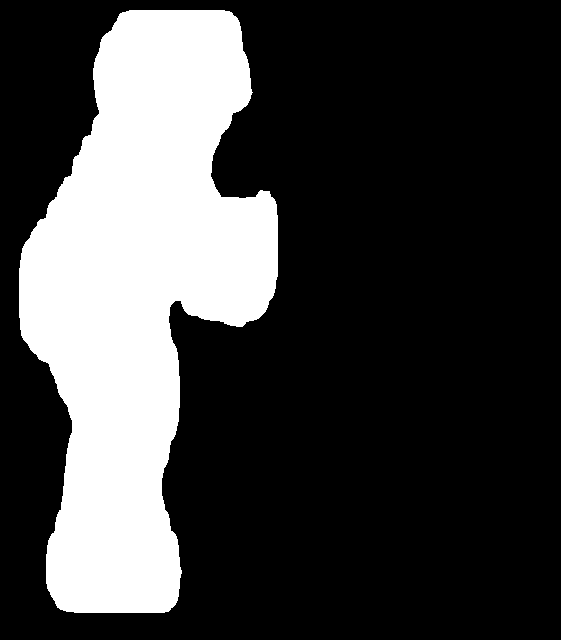

In [0]:
Image.fromarray(global_mask)

In [0]:
final_image = (np.array(img) * (global_mask==0)).astype('uint8')

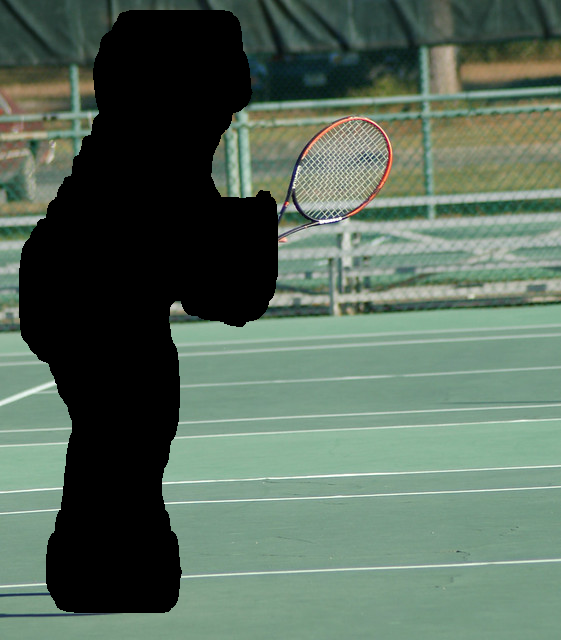

In [0]:
Image.fromarray(final_image)